In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [52]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [54]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


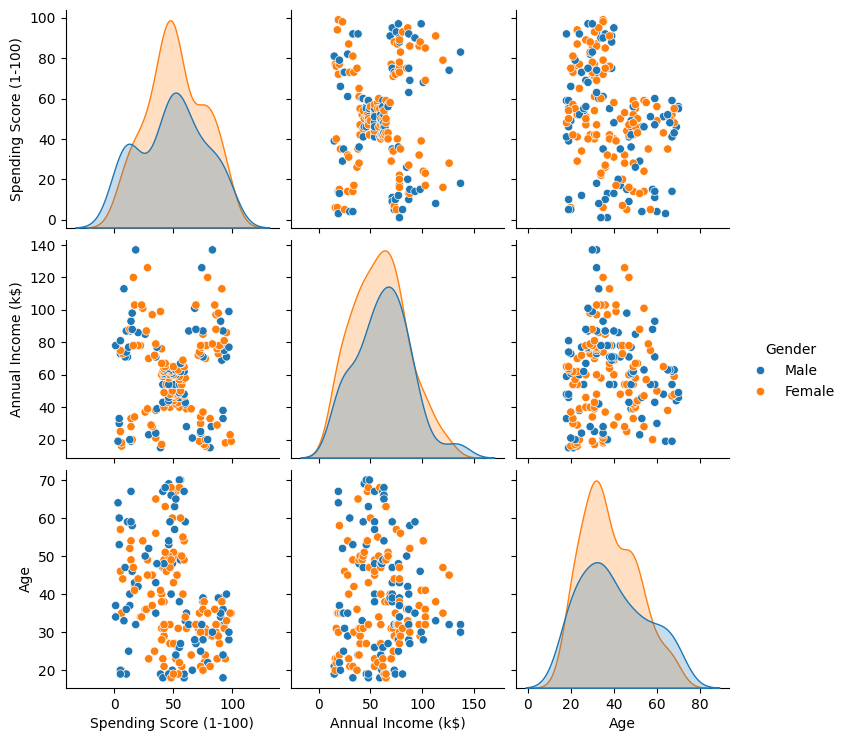

In [57]:
# sns.pairplot(df)
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

Text(0.5, 1.0, 'Age vs Spending Score')

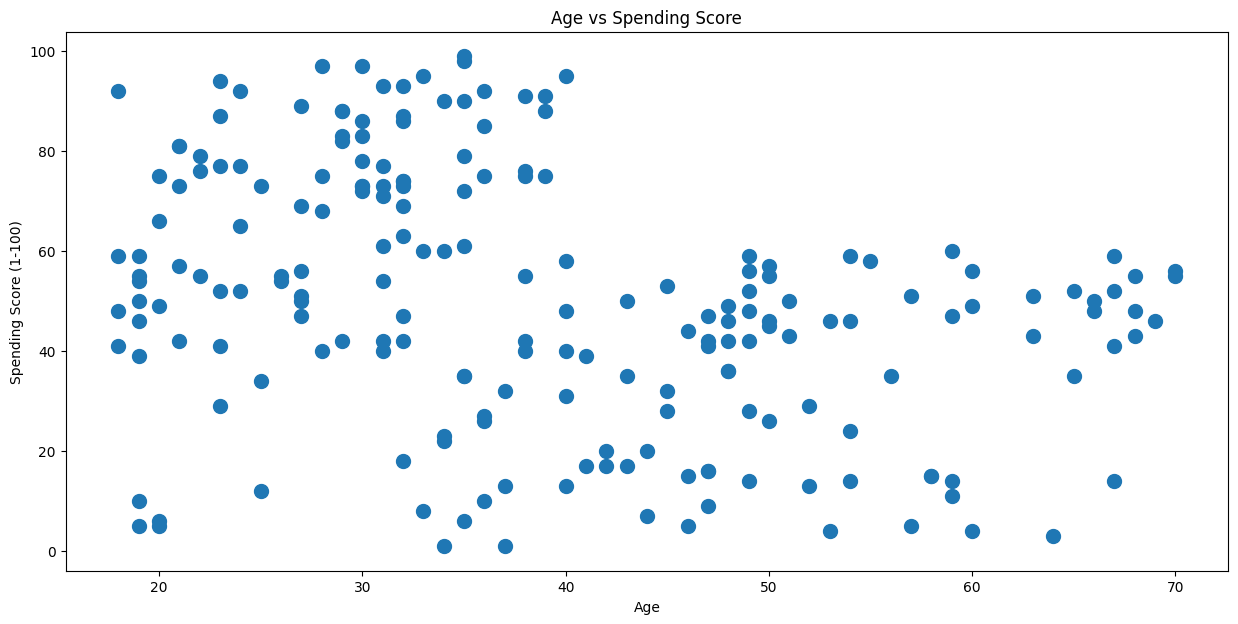

In [58]:
plt.figure(figsize=(15,7))
plt.scatter(df['Age'], df['Spending Score (1-100)'],s=100)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')

In [59]:
from sklearn.cluster import KMeans

In [60]:

X1=df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

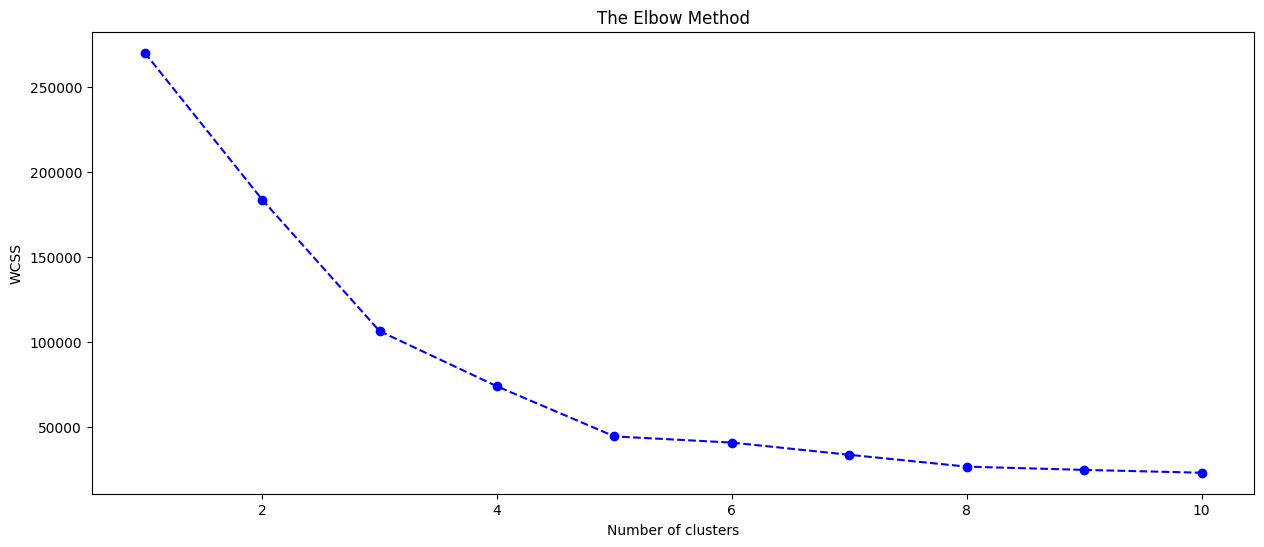

In [61]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--', color = 'b')   
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
from kneed  import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

np.int64(5)

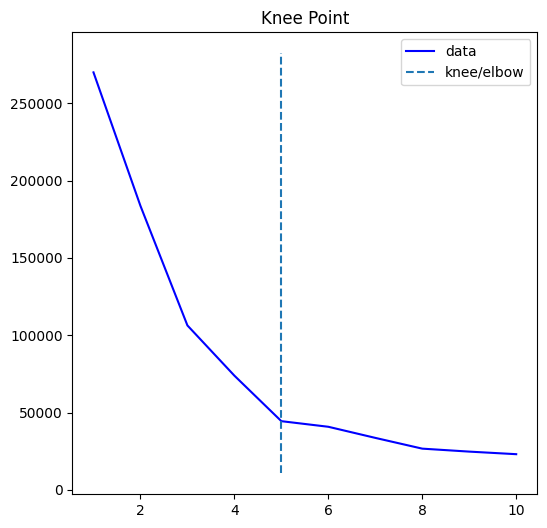

In [63]:
kl.plot_knee()

In [64]:
algorithm=(KMeans(n_clusters=kl.elbow,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(X1)


KMeans(algorithm='elkan', n_clusters=np.int64(5), n_init=10, random_state=111)

In [65]:
lables=algorithm.labels_
centroids=algorithm.cluster_centers_
h=0.02
x_min,x_max=X1[:,0].min()-1,X1[:,0].max()+1
y_min,y_max=X1[:,1].min()-1,X1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])

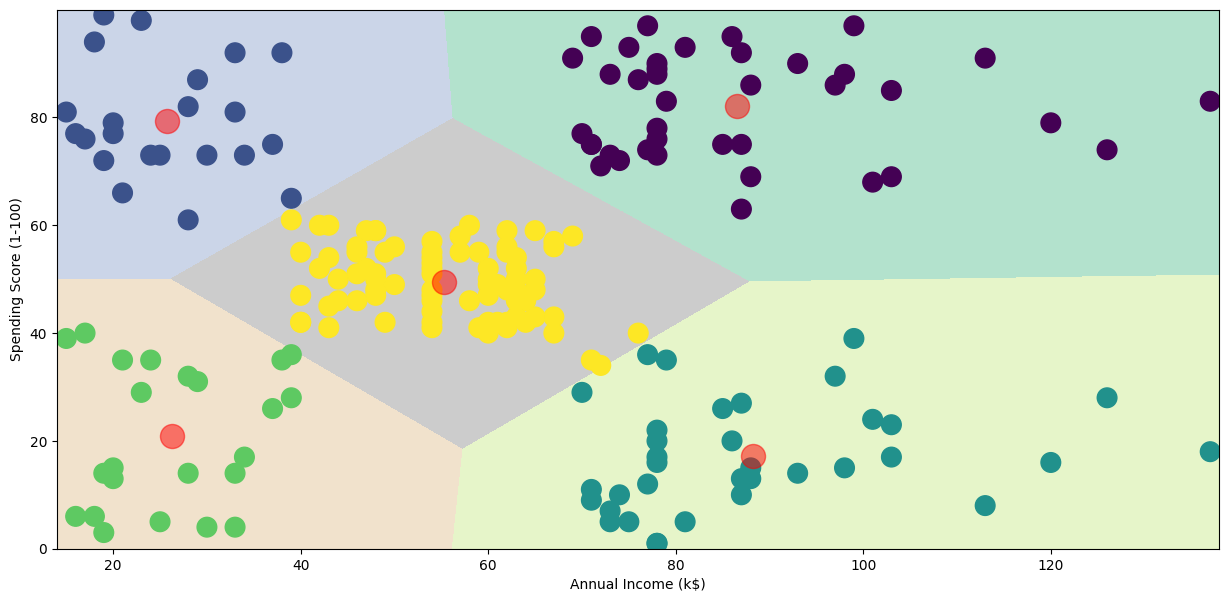

In [66]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = lables , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

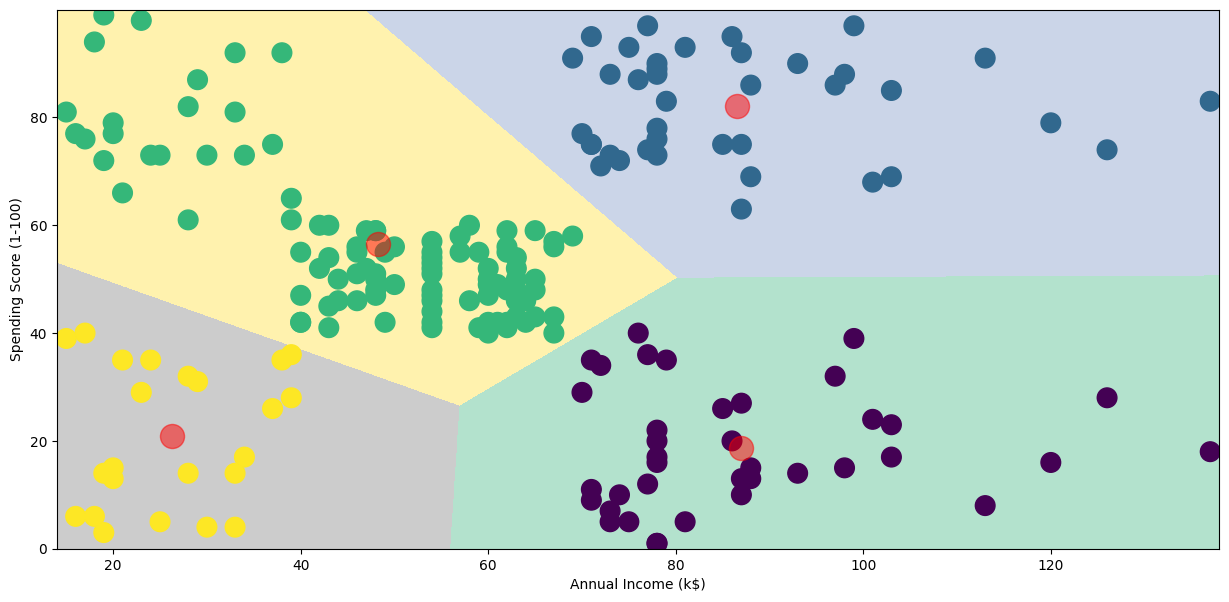

In [67]:
# K=4
algorithm=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
algorithm.fit(X1)
lables=algorithm.labels_
centroids=algorithm.cluster_centers_
h=0.02
x_min,x_max=X1[:,0].min()-1,X1[:,0].max()+1
y_min,y_max=X1[:,1].min()-1,X1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = lables , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

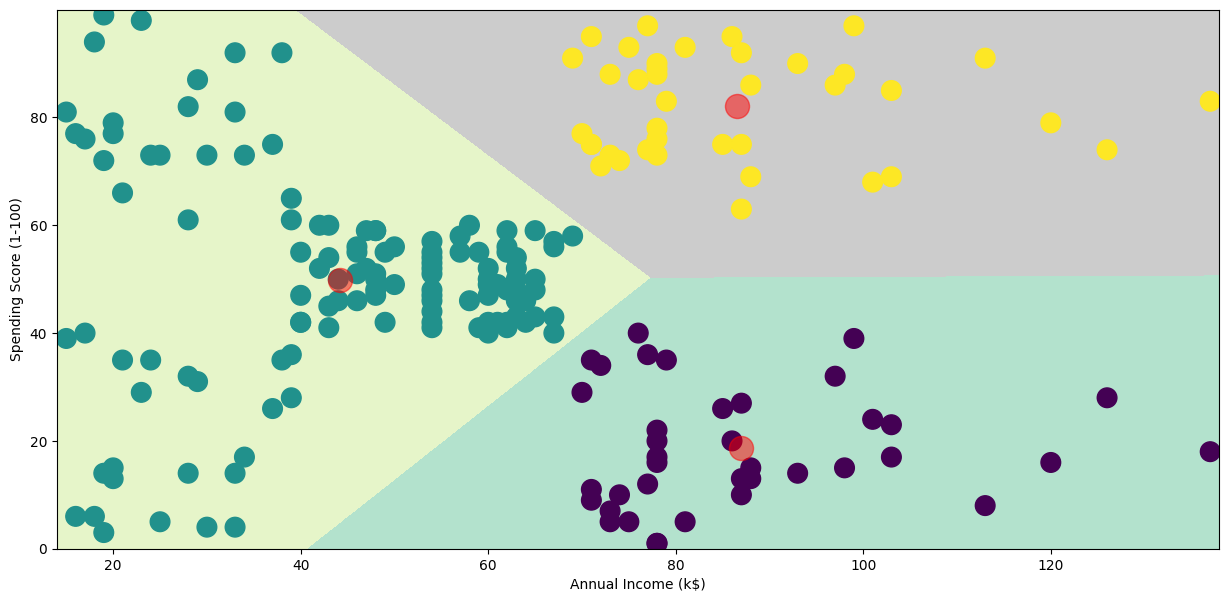

In [68]:
# K=3
algorithm=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
algorithm.fit(X1)
lables=algorithm.labels_
centroids=algorithm.cluster_centers_
h=0.02
x_min,x_max=X1[:,0].min()-1,X1[:,0].max()+1
y_min,y_max=X1[:,1].min()-1,X1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = lables , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

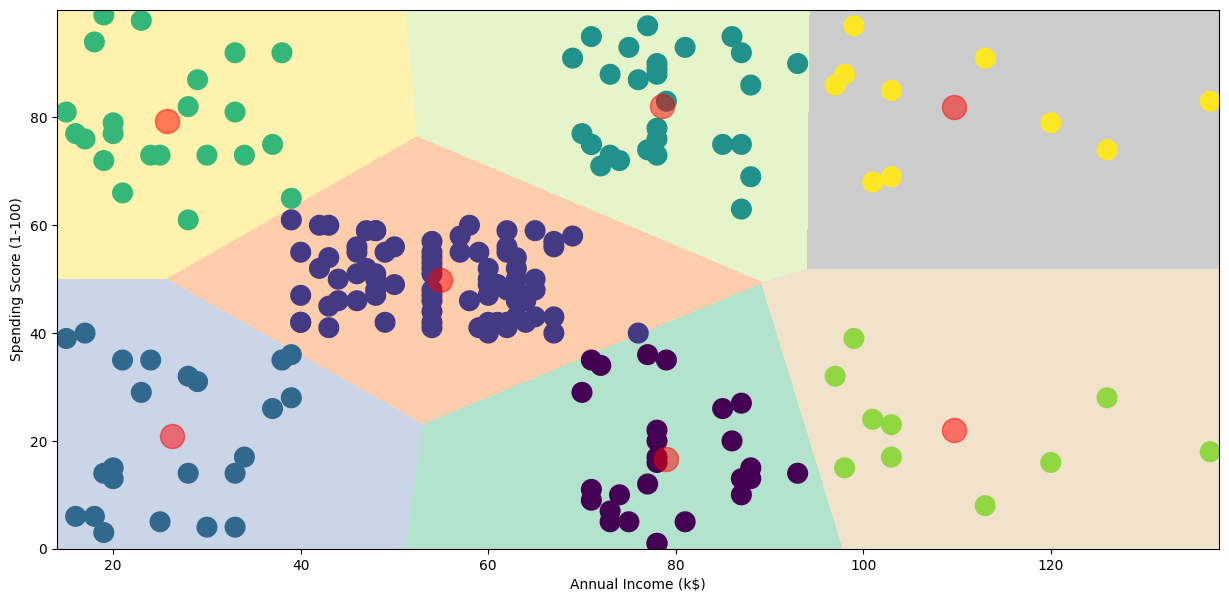

In [69]:
# K=7
algorithm=KMeans(n_clusters=7,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
algorithm.fit(X1)
lables=algorithm.labels_
centroids=algorithm.cluster_centers_
h=0.02
x_min,x_max=X1[:,0].min()-1,X1[:,0].max()+1
y_min,y_max=X1[:,1].min()-1,X1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = lables , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()